In [4]:
%cd ..

/home/tianshu/Documents/dart


In [5]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
f = h5py.File("data/cichallway/data.h5")

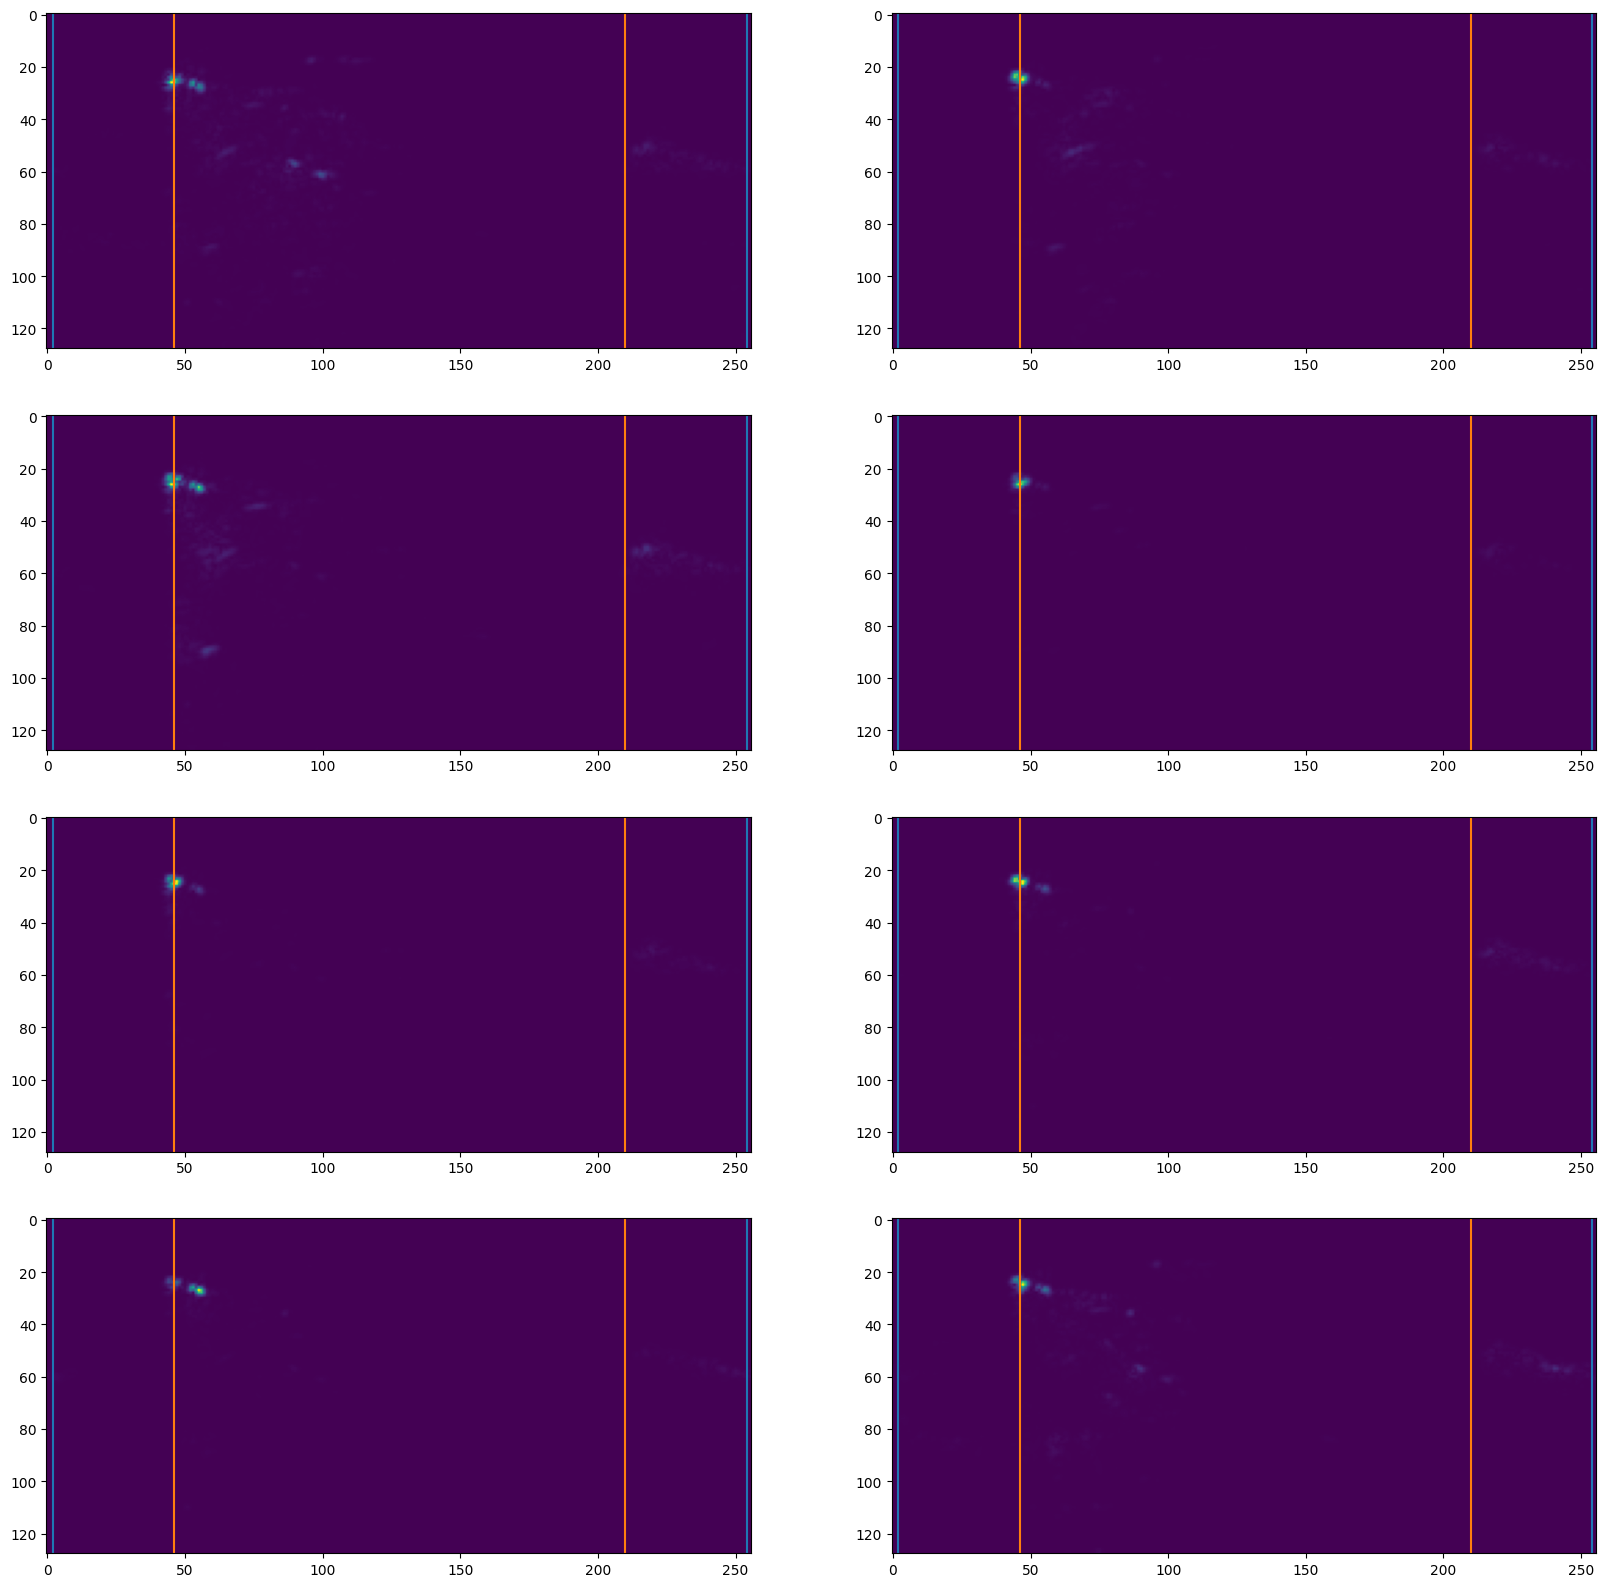

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

N = 4981
for i, ax in enumerate(axs.reshape(-1)):
    img = f['rad'][N, :, :, i]
    # ax.imshow(img > np.percentile(img, 99), aspect='auto')
    ax.imshow(img, aspect='auto')

    v_radar = int(f['speed'][N] / 0.89 * 128)
    v_slam = int(np.linalg.norm(f['vel'][N]) / 0.89 * 128)
    ax.axvline(128 - v_radar, color='C0')
    ax.axvline(128 + v_radar, color='C0')
    ax.axvline(128 - v_slam, color='C1')
    ax.axvline(128 + v_slam, color='C1')

/tmp/ipykernel_1003965/1208746426.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  vel_raw = np.array(f['vel_raw'])
/tmp/ipykernel_1003965/1208746426.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  vel = gaussian_filter1d(np.array(f['vel']), axis=0, sigma=1.0)
/tmp/ipykernel_1003965/1208746426.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  speed_radar = np.array(f['speed'])
/tmp/ipykernel_1003965/1208746426.py:13: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  t = np.array(f['t']) - f['t'][0]


(0.0, 1.1)

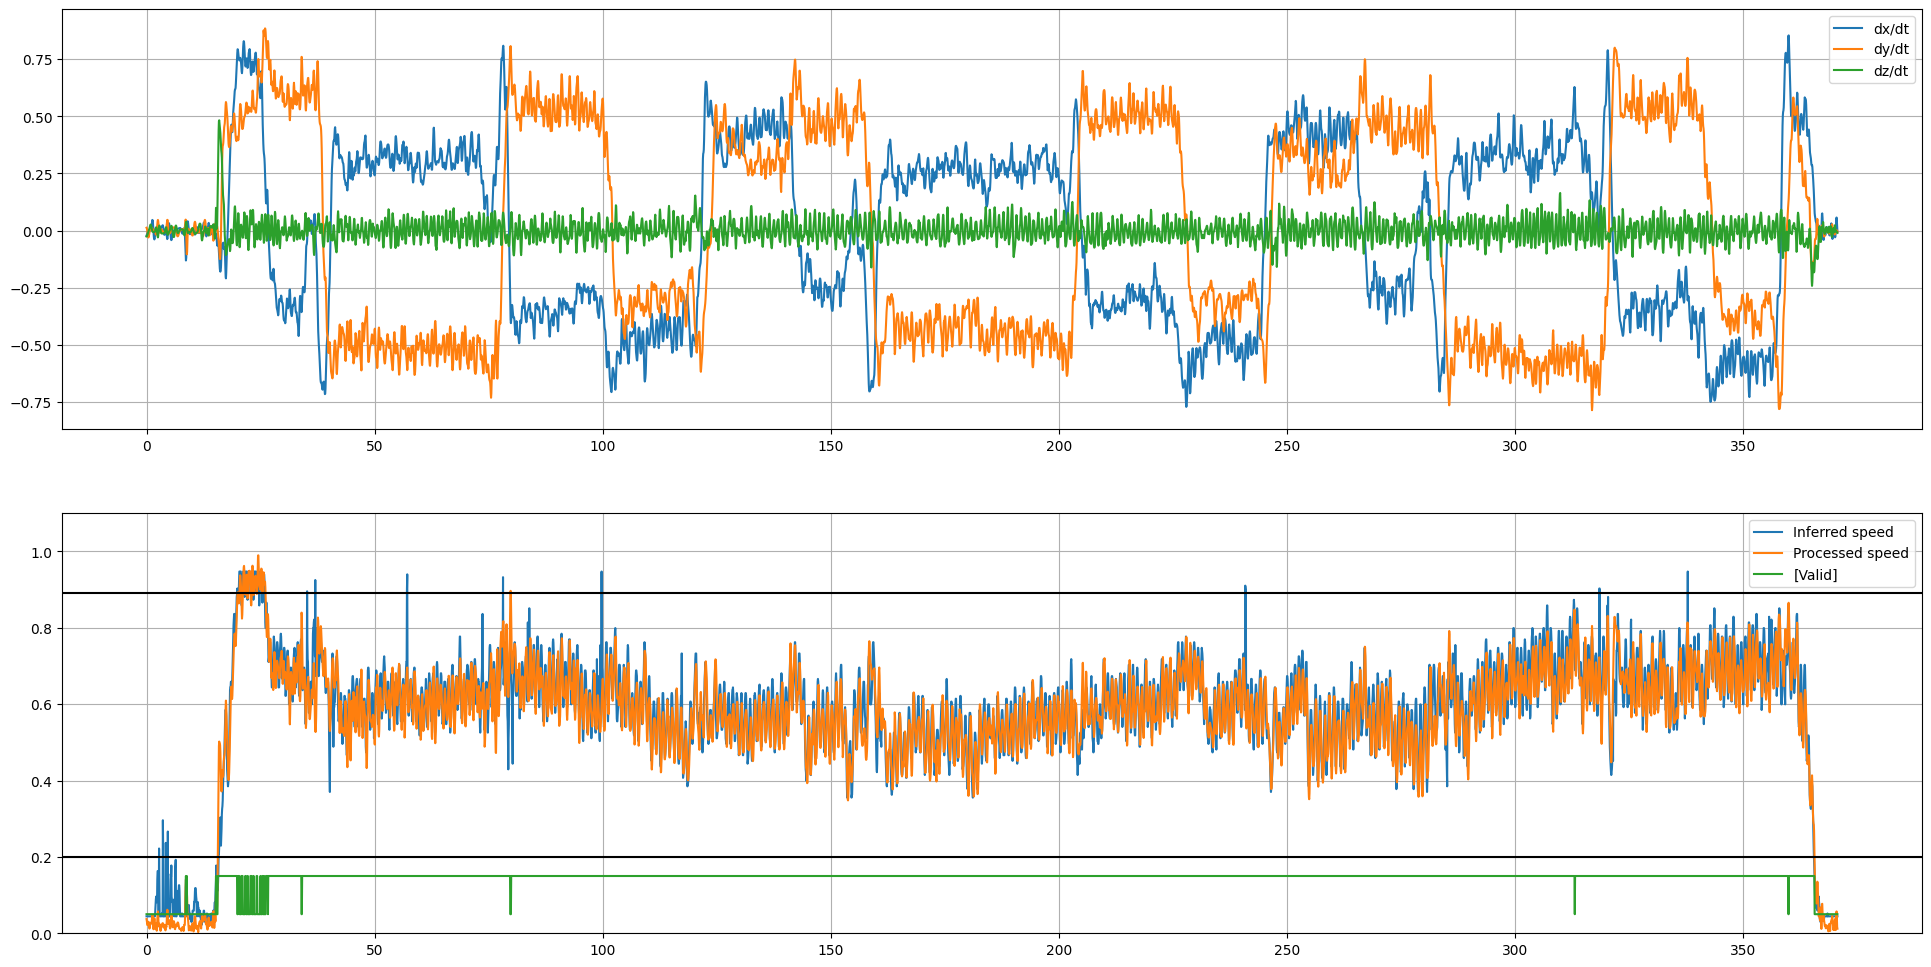

In [29]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt

f = h5py.File("data/ciccorridor/data.h5")

fig, axs = plt.subplots(2, 1, figsize=(24, 12))

vel_raw = np.array(f['vel_raw'])
vel = gaussian_filter1d(np.array(f['vel']), axis=0, sigma=1.0)
speed_radar = np.array(f['speed'])
speed_slam = np.linalg.norm(vel_raw, axis=1)
speed_out = np.linalg.norm(vel, axis=1)
t = np.array(f['t']) - f['t'][0]
# t = np.arange(vel.shape[0])

ax = axs[0]
ax.plot(t, vel[:, 0], label='dx/dt')
ax.plot(t, vel[:, 1], label='dy/dt')
ax.plot(t, vel[:, 2], label='dz/dt')
ax.legend()

ax = axs[1]
ax.plot(t, speed_radar, label='Inferred speed')
# ax.plot(t, speed_slam, label='Measured speed')
ax.plot(t, speed_out, label='Processed speed')
ax.plot(t, 0.05 + 0.1 * ((speed_slam < 0.89) & (speed_slam > 0.2)), label='[Valid]')

ax.axhline(0.89, color='black')
ax.axhline(0.2, color='black')
ax.legend()

# axs[1].set_ylim(0, 1.5)
for ax in axs:
    ax.grid()
#     ax.set_xlim(0, 100)
axs[1].set_ylim(0, 1.1)